In [ ]:
%matplotlib inline
from pylab import *
from sci378 import *

Version:  0.0.38


## Make up some data to work with

[<matplotlib.lines.Line2D>]

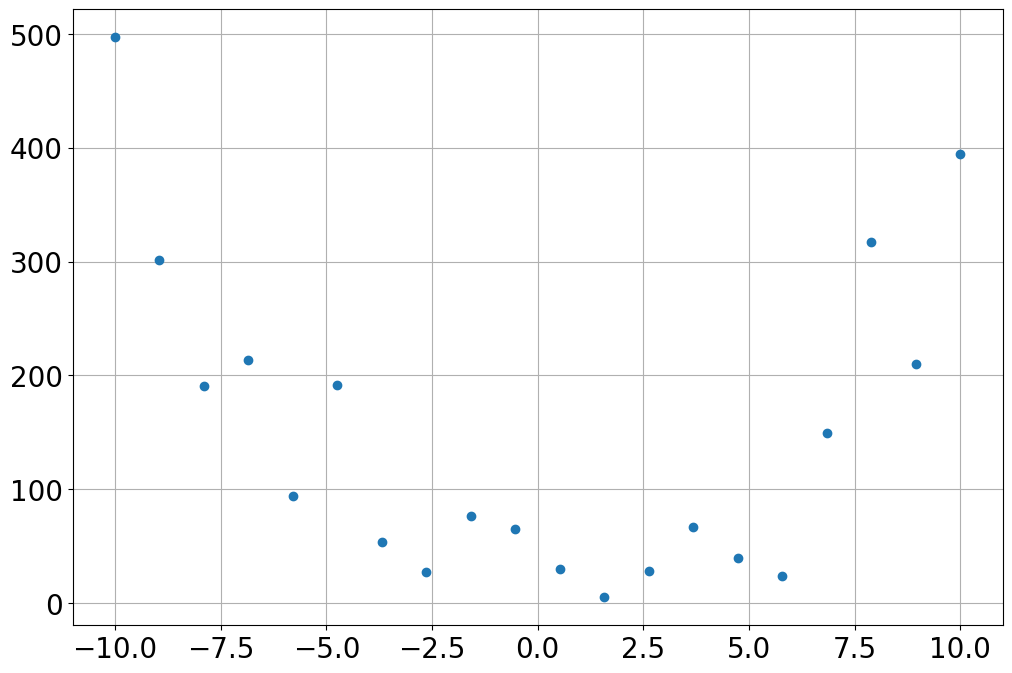

In [ ]:
x=linspace(-10,10,20)
# ax**2+bx+c
y=4*x**2-5*x+2+randn(len(x))*50
plot(x,y,'o')

In [ ]:
x_data,y_data = x,y

## Define the function

**Note:** for some odd reason, you need default values when you define the function

In [ ]:
def quadratic_function(x, a=1, b=1, c=1):
    return a*x**2 + b*x + c

## Parameter exploration - check to see if our function is designed right

[<matplotlib.lines.Line2D>]

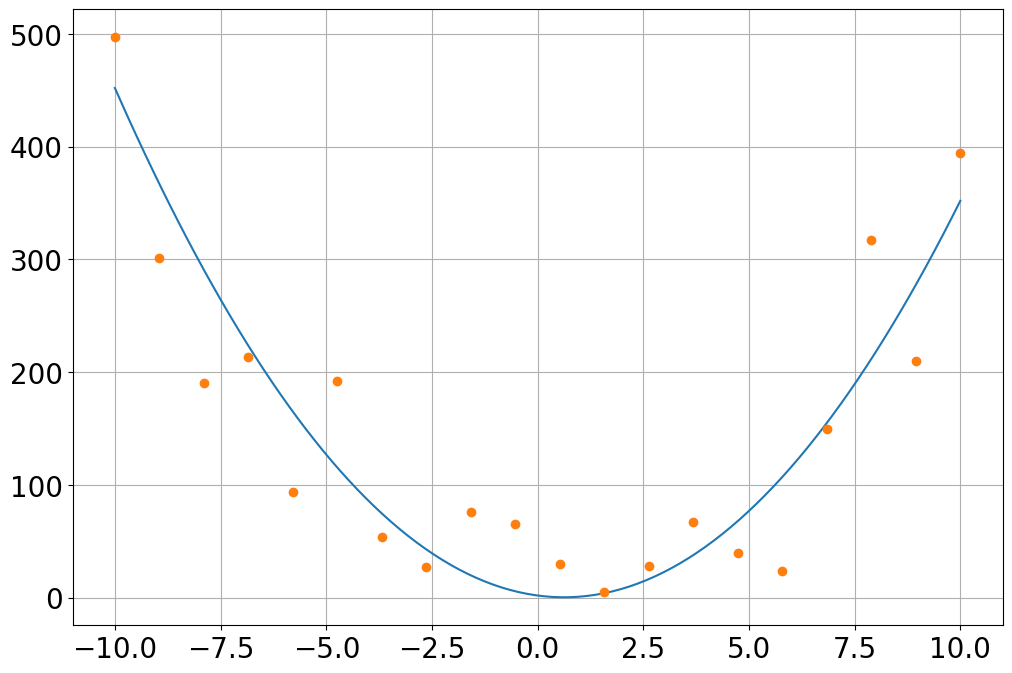

In [ ]:
x=linspace(-10,10,200)
y=quadratic_function(x, a=4, b=-5, c=2)

plot(x,y)
plot(x_data,y_data,'o')

## Define a model in lmfit

In [ ]:
from lmfit import Model,Parameter

In [ ]:
quad_model=Model(quadratic_function)

In [ ]:
quad_model.param_names

['a', 'b', 'c']

In [ ]:
params=quad_model.make_params()
params

name,value,initial value,min,max,vary
a,1.00000000,None,-inf,inf,True
b,1.00000000,None,-inf,inf,True
c,1.00000000,None,-inf,inf,True


## modify any parameters as needed -- min values, max values, etc....

In [ ]:
params['a']=Parameter("a",
                      min=0,   # minimum value
                      value=2, # initial guess
                     )

In [ ]:
params

name,value,initial value,min,max,vary
a,2.00000000,2,0.00000000,inf,True
b,1.00000000,None,-inf,inf,True
c,1.00000000,None,-inf,inf,True


## run the fit

In [ ]:
result=quad_model.fit(y_data,params,x=x_data)
result

Expected:  a=4, b=-5, c=2

## Sometimes lmfit already has the function defined

In [ ]:
from lmfit.models import QuadraticModel

In [ ]:
quad_model=QuadraticModel()
result=quad_model.fit(y_data,params,x=x_data)
result

In [ ]:
df=pd.read_csv("data/peaks/sample0.csv")
df

,t,y
0,0.203317,4800.0
1,0.206650,5017.0
2,0.209983,5202.0
3,0.213317,5361.0
4,0.216650,5520.0
...,...,...
535,1.986650,21393.0
536,1.989983,21369.0
537,1.993317,21343.0
538,1.996650,21340.0


[<matplotlib.lines.Line2D>]

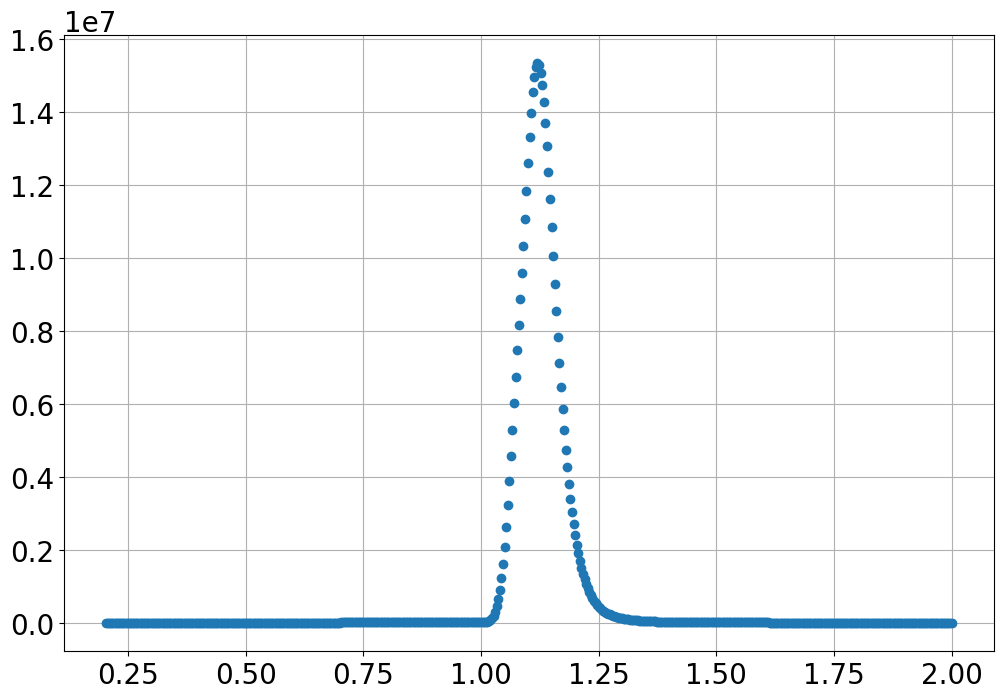

In [ ]:
x_data=df.t.values
y_data=df.y.values

plot(x_data,y_data,'o')

In [ ]:
from lmfit.models import GaussianModel

gauss_model=GaussianModel()
gauss_model.param_names

['amplitude', 'center', 'sigma']

In [ ]:
x_data=df.t.values
y_data=df.y.values

In [ ]:
result=gauss_model.fit(y_data,x=x_data)
result

In [ ]:
result.best_values

{'amplitude': 1418781.8825584105,
 'center': 1.1219109692878702,
 'sigma': 0.037922676457645466}

<matplotlib.collections.LineCollection>

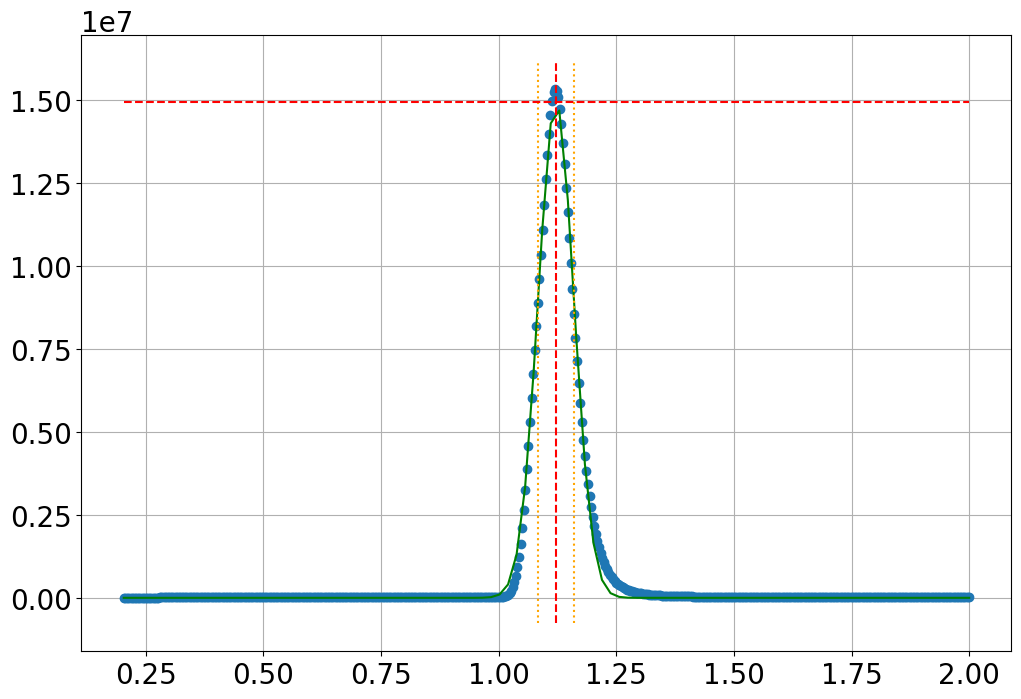

In [ ]:
A=result.best_values['amplitude']
μ=result.best_values['center']
σ=result.best_values['sigma']


xx=linspace(min(x_data),max(x_data),100)  # theoretical x values
yy=result.eval(x=xx)
plot(x_data,y_data,'o')
plot(xx,yy,'g-')

yl=ylim()

vlines(μ,yl[0],yl[1],ls='--',color='red')
vlines(μ-σ,yl[0],yl[1],ls=':',color='orange')
vlines(μ+σ,yl[0],yl[1],ls=':',color='orange')
hlines(A/sqrt(2*pi)/σ,xx[0],xx[-1],ls='--',color='red')

In [ ]:
max(y_data)

15331592.0

In [ ]:
A

1418781.8825584105

[<matplotlib.lines.Line2D>]

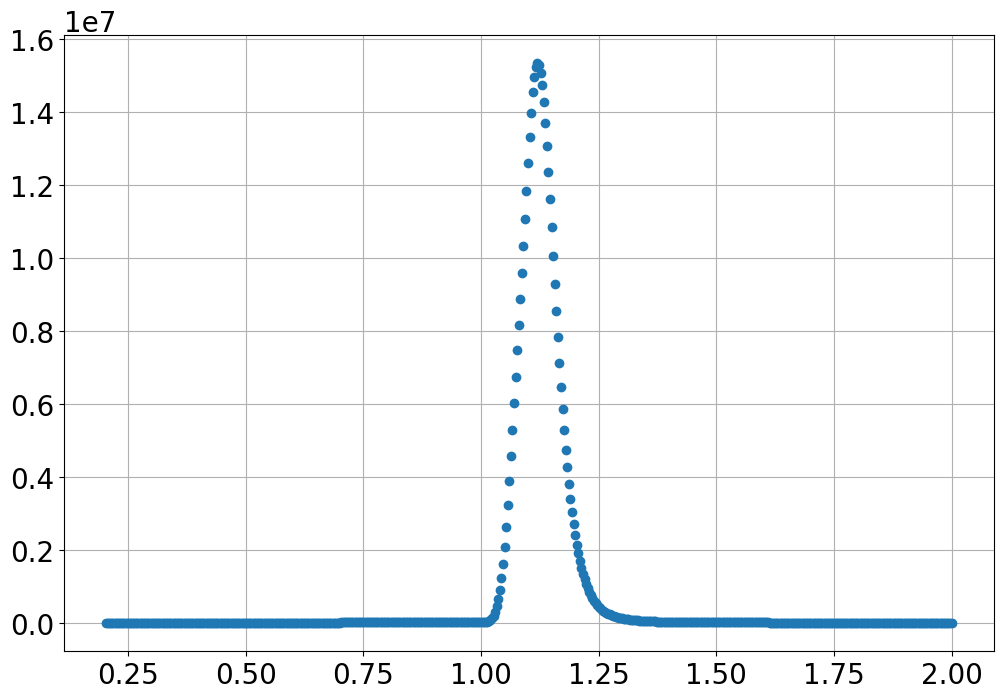

In [ ]:
plot(x_data,y_data,'o')

In [ ]:
df=pd.read_csv("data/crichton/logan airport.csv")
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1936,-1.92,-4.91,5.61,7.57,16.10,19.34,21.93,21.16,17.20,12.68,4.37,1.78,-2.66,9.76,20.81,11.42,9.83
1,1937,3.14,0.82,1.32,7.52,15.21,19.26,23.05,23.79,17.33,11.62,6.79,-0.33,1.91,8.02,22.03,11.91,10.97
2,1938,-2.13,-0.70,4.03,9.39,13.30,19.68,22.18,23.20,16.89,13.45,8.08,1.13,-1.05,8.91,21.69,12.81,10.59
3,1939,-2.23,0.27,0.63,6.56,13.61,18.74,22.42,23.28,18.10,12.33,4.90,0.79,-0.28,6.93,21.48,11.78,9.98
4,1940,-5.01,-1.34,0.62,6.42,13.48,18.39,21.96,20.25,17.38,10.31,6.05,1.23,-1.85,6.84,20.20,11.25,9.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2019,-0.63,0.92,3.97,10.97,14.37,20.17,25.97,23.42,19.97,14.17,5.97,2.91,1.09,9.77,23.19,13.37,11.85
84,2020,3.36,3.21,5.46,7.01,13.76,20.71,24.06,23.41,18.66,12.66,8.86,2.26,3.16,8.74,22.73,13.39,12.01
85,2021,-0.54,-0.64,5.61,10.46,16.31,23.56,22.41,24.96,20.91,15.46,7.06,4.00,0.36,10.79,23.64,14.48,12.32
86,2022,-2.50,0.70,5.20,10.05,15.85,19.95,25.30,24.85,18.45,13.65,9.40,2.95,0.73,10.37,23.37,13.83,12.07


[<matplotlib.lines.Line2D>]

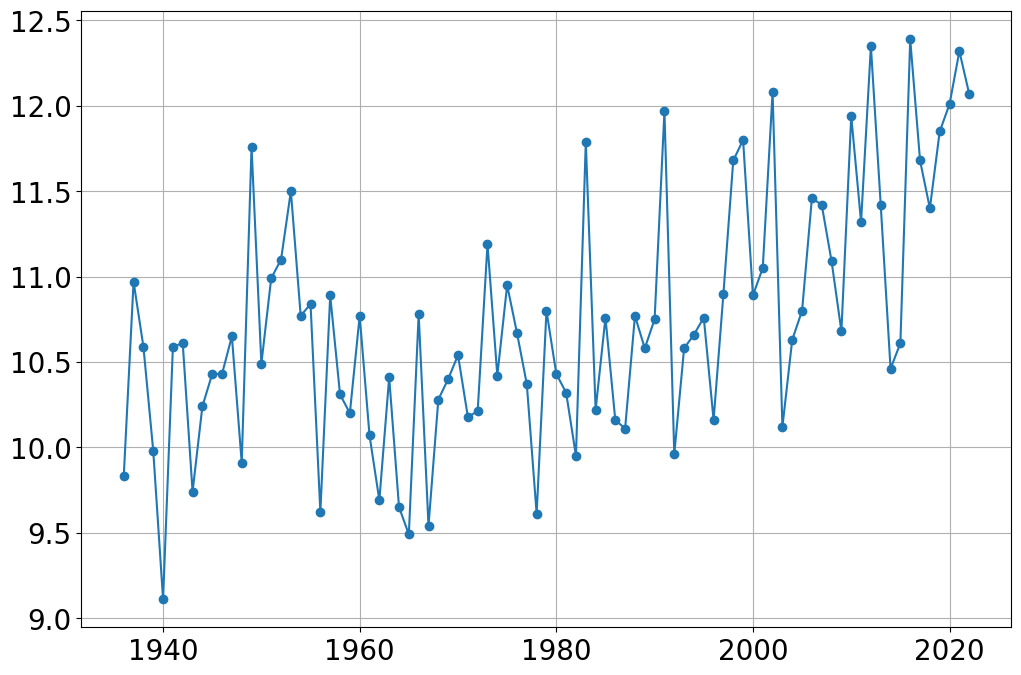

In [ ]:
t=df.YEAR
y=df.metANN

t=t.values[y<500]
y=y.values[y<500]
plot(t,y,'-o')

In [ ]:
from lmfit.models import LinearModel

In [ ]:
mymodel=LinearModel()
result=mymodel.fit(y,x=t)
result

Text(1941, 12.290000000000001, '$y=0.0160x+-20.8720$')

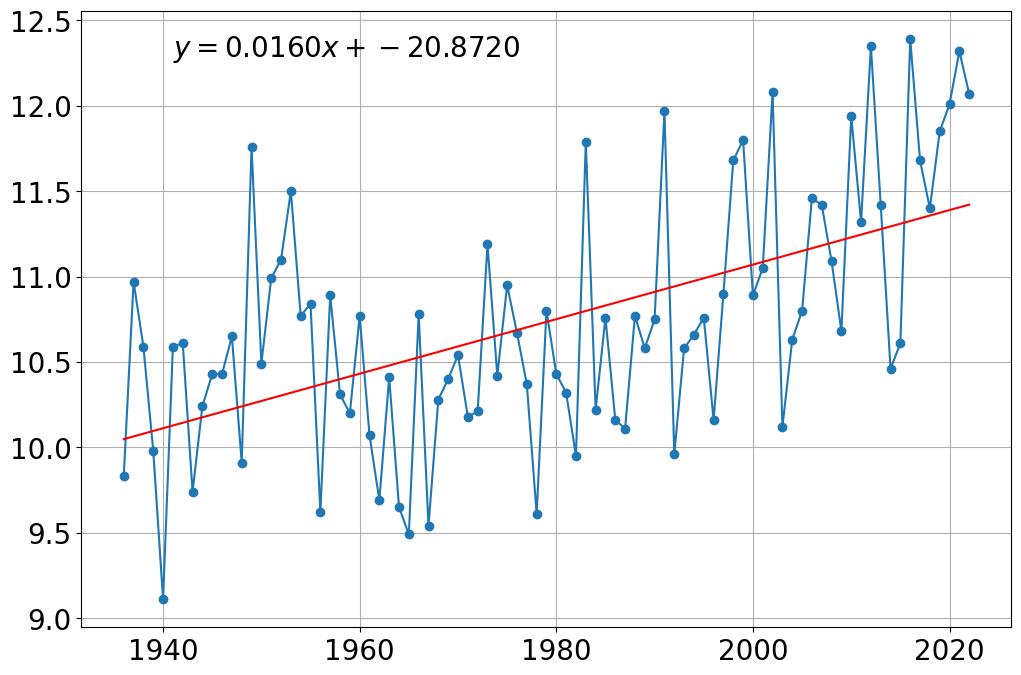

In [ ]:
plot(t,y,'-o')

tt=linspace(min(t),max(t),100)
yy=result.eval(x=tt)
plot(tt,yy,'r-')


text(min(t)+5,max(y)-.1,
     f"$y={result.params['slope'].value:.4f}x+{result.params['intercept'].value:.4f}$")

In [ ]:
def get_temperature_time_slope(filename,plotit=False):
    from lmfit.models import LinearModel
    
    df=pd.read_csv(filename)
    t=df.YEAR
    y=df.metANN

    t=t.values[y<500]
    y=y.values[y<500]    
    
    if plotit:
        plot(t,y,'-o')
        
    mymodel=LinearModel()
    result=mymodel.fit(y,x=t)  
    
    return result.best_values['slope']

In [ ]:
get_temperature_time_slope('data/crichton/logan airport.csv')

0.01597105781101725

In [ ]:
from glob import glob

In [ ]:
filenames=glob('data/crichton/logan*.csv')
filenames

['data/crichton/logan airport copy 2.csv',
 'data/crichton/logan airport copy 3.csv',
 'data/crichton/logan airport.csv',
 'data/crichton/logan airport copy.csv']

In [ ]:
slopes=[get_temperature_time_slope(filename) for filename in filenames]
slopes

[0.01597105781101725,
 0.01597105781101725,
 0.01597105781101725,
 0.01597105781101725]

In [ ]:
slope_data={}
for filename in filenames:
    slope_data[filename]=get_temperature_time_slope(filename)
slope_data

{'data/crichton/logan airport copy 2.csv': 0.01597105781101725,
 'data/crichton/logan airport copy 3.csv': 0.01597105781101725,
 'data/crichton/logan airport.csv': 0.01597105781101725,
 'data/crichton/logan airport copy.csv': 0.01597105781101725}